---
<h1 align='center'> Predicting Zomato Restaurants Ratings</h1>

---

# **1. Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

---
# **2. Load the data**

In [3]:
df=pd.read_excel("zomato_train.xlsx")
df.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


---
# **3. Exploratory Data Analysis (EDA)**

In [4]:
df.tail()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
41368,https://www.zomato.com/bangalore/koshys-st-mar...,"39, St. Marks Road, Bangalore",Koshy's,No,No,2332,080 22915840\n080 22213793,St. Marks Road,Casual Dining,"Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...","South Indian, North Indian, Chinese, Beverages",700,"[('Rated 4.0', 'RATED\n A place where you get...",[],Dine-out,Residency Road,3.8
41369,https://www.zomato.com/bangalore/midnight-spec...,"521, 2nd Floor, Teachers Colony, Sarjapura Rin...",Midnight Special,Yes,No,0,+91 80420780493,HSR,"Takeaway, Delivery",NaN,"North Indian, Fast Food, Chinese",500,[],[],Delivery,Koramangala 4th Block,NaN
41370,https://www.zomato.com/bangalore/sholay-the-ba...,"1, RMV 2nd Stage, 3rd Block, Chikkamaranahalli...",Sholay - The Barbeque,Yes,Yes,45,+91 7619328882,New BEL Road,Casual Dining,NaN,"North Indian, BBQ","1,200","[('Rated 2.0', 'RATED\n That building homes t...",[],Dine-out,New BEL Road,3.5
41371,https://www.zomato.com/bangalore/ghar-ka-bhoja...,"93, 1st Floor, Opoosite Venkateshwara Temple, ...",Ghar Ka Bhojan,No,No,7,+91 9945810850\n+91 9997888609,Domlur,Delivery,NaN,"North Indian, Healthy Food",200,"[('Rated 1.0', 'RATED\n Food not upto the mar...",[],Delivery,MG Road,3.3
41372,https://www.zomato.com/bangalore/sree-sagar-ba...,"8, Yarab Nagar Main Road, 2nd Stage, Banashank...",Sree Sagar,Yes,No,0,+91 9449150005,Banashankari,Quick Bites,NaN,South Indian,200,"[('Rated 3.5', ""RATED\n Visited this restaura...",[],Dine-out,Basavanagudi,NaN


In [5]:
# shape of data
df.shape

(41373, 17)

### dataset have 41373 rows and 17 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          41373 non-null  object
 1   address                      41373 non-null  object
 2   name                         41373 non-null  object
 3   online_order                 41373 non-null  object
 4   book_table                   41373 non-null  object
 5   votes                        41373 non-null  int64 
 6   phone                        40402 non-null  object
 7   location                     41358 non-null  object
 8   rest_type                    41198 non-null  object
 9   dish_liked                   18901 non-null  object
 10  cuisines                     41341 non-null  object
 11  approx_cost(for two people)  41094 non-null  object
 12  reviews_list                 41373 non-null  object
 13  menu_item                    41

### we have some null value in dataset

### check how many null value in each columns

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [8]:
#columns in datasset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

---
## 3.1 Dropped irrelevant Columns

In [9]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
0,Yes,No,13,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
2,No,No,6,BTM,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
4,Yes,No,129,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


---
## 3.2 Remove Duplicates value

In [10]:
df.duplicated().sum()

283

### We have 64 duplicated values so drop it

In [11]:
df.drop_duplicates(inplace=True)

---
## 3.3 Removing Null Values

In [12]:
# check null value percent
(df.isna().sum()/df.shape[0])*100

online_order                    0.000000
book_table                      0.000000
votes                           0.000000
location                        0.034072
rest_type                       0.423461
dish_liked                     54.066683
cuisines                        0.075444
approx_cost(for two people)     0.674130
listed_in(type)                 0.000000
listed_in(city)                 0.000000
rates                          18.856169
dtype: float64

In [13]:
df['dish_liked'].isna().sum()

22216

In [14]:
df['votes']=df['votes'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41090 entries, 0 to 41372
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 41090 non-null  object
 1   book_table                   41090 non-null  object
 2   votes                        41090 non-null  int32 
 3   location                     41076 non-null  object
 4   rest_type                    40916 non-null  object
 5   dish_liked                   18874 non-null  object
 6   cuisines                     41059 non-null  object
 7   approx_cost(for two people)  40813 non-null  object
 8   listed_in(type)              41090 non-null  object
 9   listed_in(city)              41090 non-null  object
 10  rates                        33342 non-null  object
dtypes: int32(1), object(10)
memory usage: 2.0+ MB


### Dish_liked column has 22435 Null value almost half of total rows

In [15]:
df['rates'].isna().sum()

7748

### Rates column has also 7964 Null values

In [16]:
#unique rating in rates columns
df['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', nan, '3.2 ', '3.3 ', '2.9', '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '3.3', '2.6', '4.0', '2.8',
       '-', '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

### See we have 'nan' into Rates columns, 'nan' treated as a String Not as a Null value

###  Removing '-' and " " from rate column

In [17]:
#df.rates.str.replace('-',np.NaN)
df['rates']=df['rates'].str.replace(" ","")
df['rates']=df['rates'].str.replace('-','NaN')
df['rates']=df['rates'].fillna('NaN')
df['rates'].unique()

array(['3.1', '4.6', '3.4', '4.3', '3.7', '3.0', '3.9', '4.1', '3.6',
       '3.8', '3.2', 'NaN', '3.3', '2.9', '4.4', '4.2', '4.0', '3.5',
       '2.7', '4.5', '4.7', '2.8', '2.2', '2.6', '2.5', '2.3', '4.8',
       '2.4', '4.9', '2.1', '2.0', '1.8'], dtype=object)

### Remove ',' from "approx_cost(for two people)" columns

In [18]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(",","")
df['approx_cost(for two people)'].unique()

array(['350', '1800', '250', '1500', '150', '1000', '450', '2500', '700',
       '600', '400', '300', '500', '650', '800', '200', '100', '3500',
       nan, '550', '1200', '950', '2100', '1700', '1600', '750', '2000',
       '850', '2200', '1300', '900', '1100', '330', '3000', '199', '4000',
       '2600', '80', '1400', '230', '140', '180', '40', '1900', '2400',
       '2800', '130', '1050', '50', '120', '360', '1450', '1250', '1350',
       '6000', '70', '4500', '4100', '160', '2300', '5000', '3200',
       '3700', '1650', '3400', '240', '2700', '190', '60'], dtype=object)

In [19]:
df.isna().sum()

online_order                       0
book_table                         0
votes                              0
location                          14
rest_type                        174
dish_liked                     22216
cuisines                          31
approx_cost(for two people)      277
listed_in(type)                    0
listed_in(city)                    0
rates                              0
dtype: int64

### Rename the columns

In [20]:
df=df.rename(columns={"approx_cost(for two people)" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})
df.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city,rates
0,Yes,No,13,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental",1800,Dine-out,Koramangala 6th Block,4.6
2,No,No,6,BTM,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos",1500,Dine-out,Residency Road,4.3
4,Yes,No,129,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


## Remove Null values from 'Rates' and "avg_cost" columns

In [21]:
df.dropna(subset=['rates','avg_cost','rest_type'],inplace=True)

In [22]:
df['avg_cost']=df['avg_cost'].astype(int)

In [23]:
df.shape

(40655, 11)

### Check null values in columns

In [24]:
df['rates']=df['rates'].astype(float)
df.isna().sum()

online_order        0
book_table          0
votes               0
location            0
rest_type           0
dish_liked      21945
cuisines           14
avg_cost            0
meal_type           0
city                0
rates            7683
dtype: int64

### See we have no null values in 'rates' and 'avg_cost' now
### Only 'rest_type', 'cuisines' and 'dish_liked' columns have a null values

### Remove 'cuisine' null values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40655 entries, 0 to 41372
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  40655 non-null  object 
 1   book_table    40655 non-null  object 
 2   votes         40655 non-null  int32  
 3   location      40655 non-null  object 
 4   rest_type     40655 non-null  object 
 5   dish_liked    18710 non-null  object 
 6   cuisines      40641 non-null  object 
 7   avg_cost      40655 non-null  int32  
 8   meal_type     40655 non-null  object 
 9   city          40655 non-null  object 
 10  rates         32972 non-null  float64
dtypes: float64(1), int32(2), object(8)
memory usage: 2.2+ MB


In [26]:
df=df[df.cuisines.isna()==False]
df=df[df.rest_type.isna()==False]
df.isna().sum()

online_order        0
book_table          0
votes               0
location            0
rest_type           0
dish_liked      21931
cuisines            0
avg_cost            0
meal_type           0
city                0
rates            7674
dtype: int64

### See no Null value in 'cuisines'column now

In [27]:
df['location'].unique()

array(['Richmond Road', 'Koramangala 5th Block', 'BTM', 'Lavelle Road',
       'Koramangala 8th Block', 'Shanti Nagar', 'Marathahalli',
       'Koramangala 7th Block', 'Bannerghatta Road', 'Brigade Road',
       'Thippasandra', 'Majestic', 'Whitefield', 'Bellandur', 'Ulsoor',
       'Koramangala 6th Block', 'HSR', 'Domlur', 'JP Nagar', 'Hennur',
       'Jayanagar', 'Malleshwaram', 'Frazer Town', 'New BEL Road',
       'Old Airport Road', 'Kalyan Nagar', 'Church Street',
       'Commercial Street', 'Koramangala 4th Block', 'Bommanahalli',
       'Residency Road', 'Indiranagar', 'Banaswadi', 'Banashankari',
       'MG Road', 'Sadashiv Nagar', 'Kaggadasapura', 'Brookefield',
       'Nagawara', 'Cunningham Road', 'Sarjapur Road', 'Kammanahalli',
       'HBR Layout', 'Electronic City', 'Basavanagudi', 'Hosur Road',
       'Vijay Nagar', 'Rajajinagar', 'Koramangala',
       'Koramangala 1st Block', 'CV Raman Nagar', 'RT Nagar',
       'Kumaraswamy Layout', 'Vasanth Nagar', 'St. Marks Road',


In [28]:
df['city'].unique()

array(['Residency Road', 'Koramangala 6th Block', 'Koramangala 4th Block',
       'BTM', 'Sarjapur Road', 'Bannerghatta Road', 'MG Road',
       'Indiranagar', 'Lavelle Road', 'Whitefield',
       'Koramangala 7th Block', 'Bellandur', 'Brigade Road', 'Jayanagar',
       'HSR', 'Old Airport Road', 'JP Nagar', 'Kammanahalli',
       'Rajajinagar', 'New BEL Road', 'Basavanagudi', 'Frazer Town',
       'Church Street', 'Kalyan Nagar', 'Malleshwaram', 'Marathahalli',
       'Brookefield', 'Banashankari', 'Koramangala 5th Block',
       'Electronic City'], dtype=object)

### As you see 'Location' columns has more sublocations
### and 'city' columns have a better Locations so we drop 'Location' column

In [29]:
del df['location']
df.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city,rates
0,Yes,No,13,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental",1800,Dine-out,Koramangala 6th Block,4.6
2,No,No,6,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos",1500,Dine-out,Residency Road,4.3
4,Yes,No,129,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


---
# **4. Data Visualization**

## 4.1 Number of restaurtants that take online order

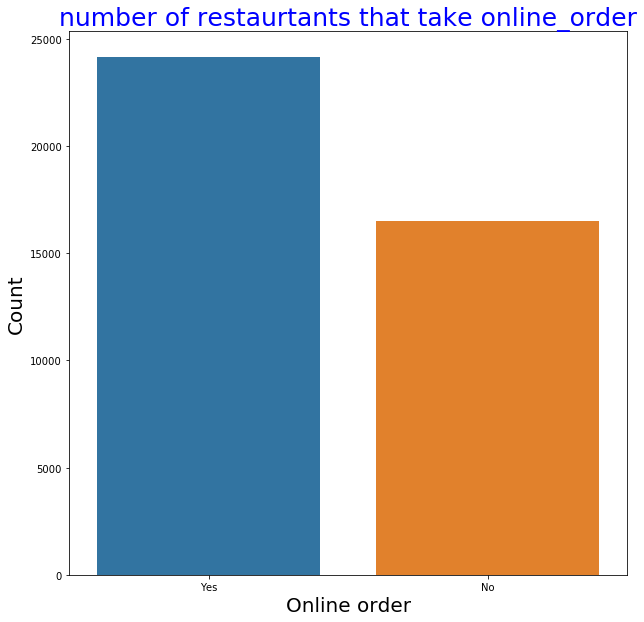

In [30]:
plt.figure(figsize=(10,10))

sns.countplot(df['online_order'])
plt.title("number of restaurtants that take online_order",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

---
## 4.2 number of restaurants that have the option to book table

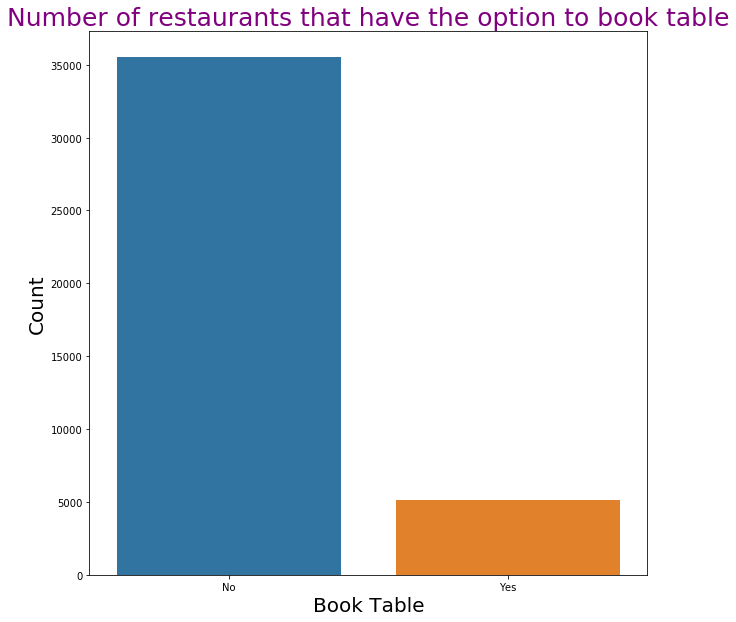

In [31]:
plt.figure(figsize=(10,10))

sns.countplot(df['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

---
## 4.3 Number of restaurants with meal type

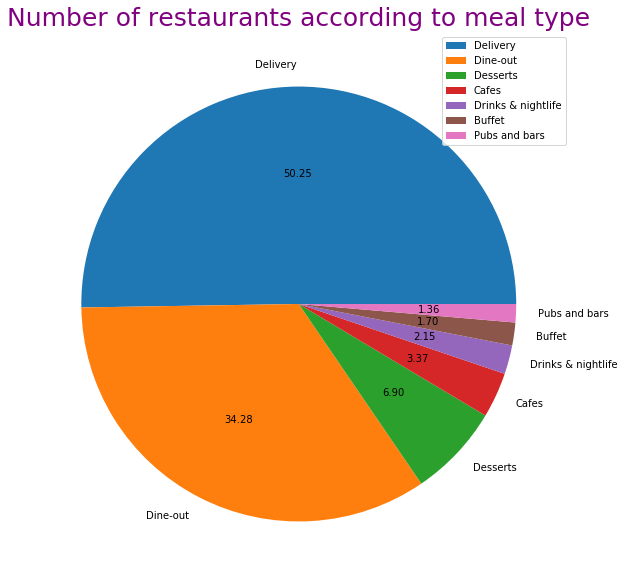

In [32]:
plt.figure(figsize=(10,10))
ax =df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of restaurants according to meal type",fontsize=25,color='purple')
plt.legend()
plt.show()

---
## 4.4 number of restaurants in each area of banglore

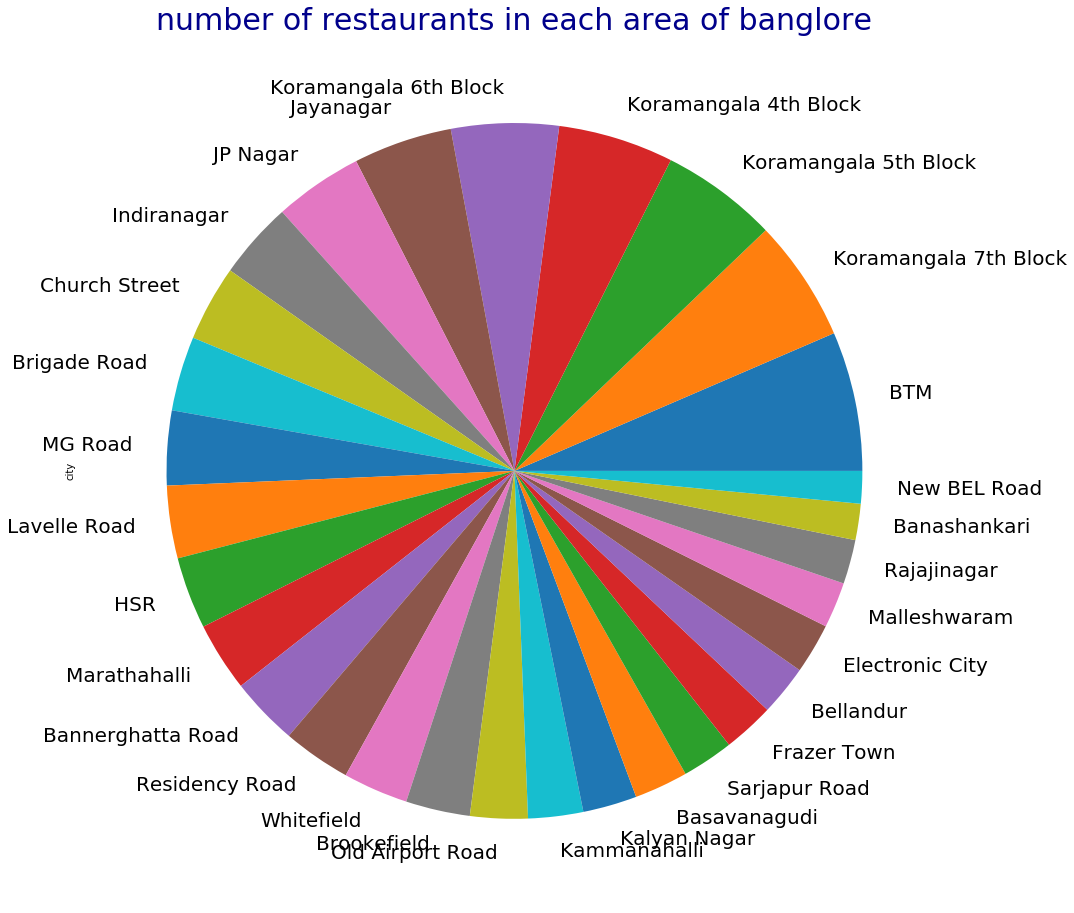

In [33]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=30,color='darkblue')
plt.show()

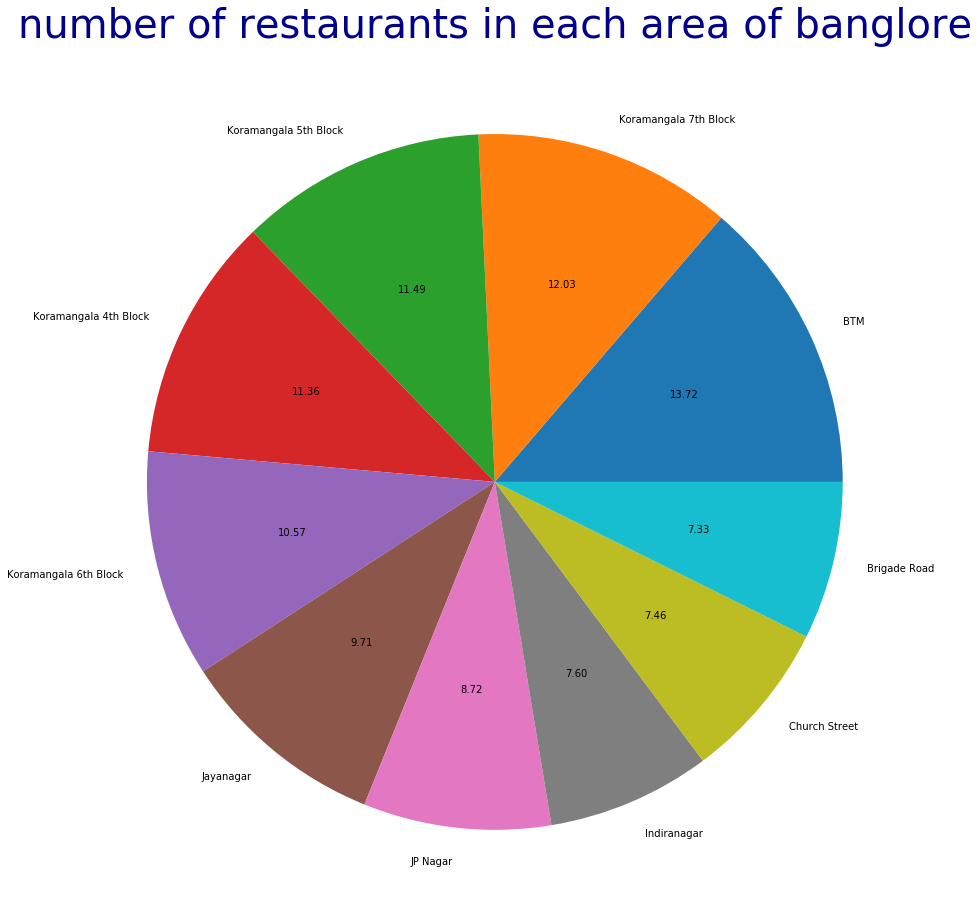

In [34]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()[:10]
labels=df['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

###  Wee BTM location have most of restaurants
### TOP 10 location restaurants

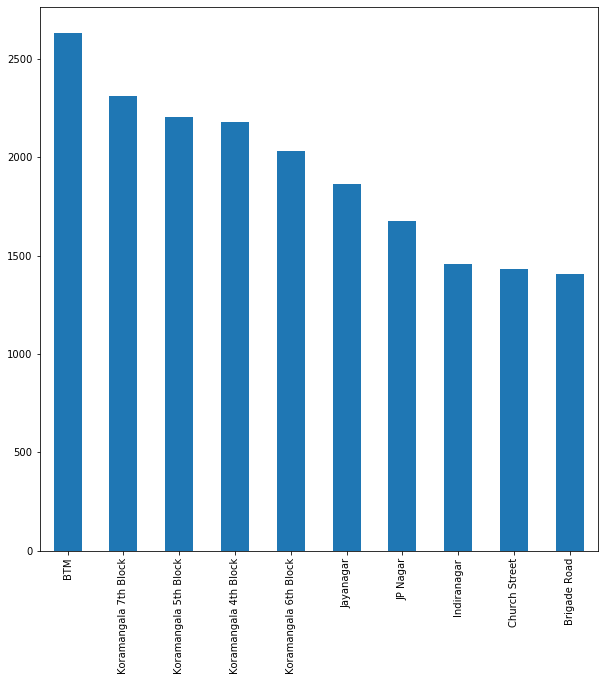

In [35]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

---
## 4.5 Type of Restaurant in City

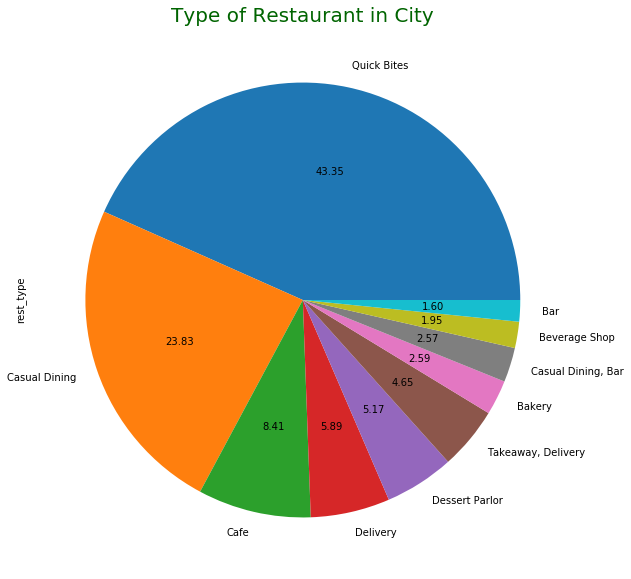

In [36]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

---
## 4.6 Number of Type of Restaurant in City

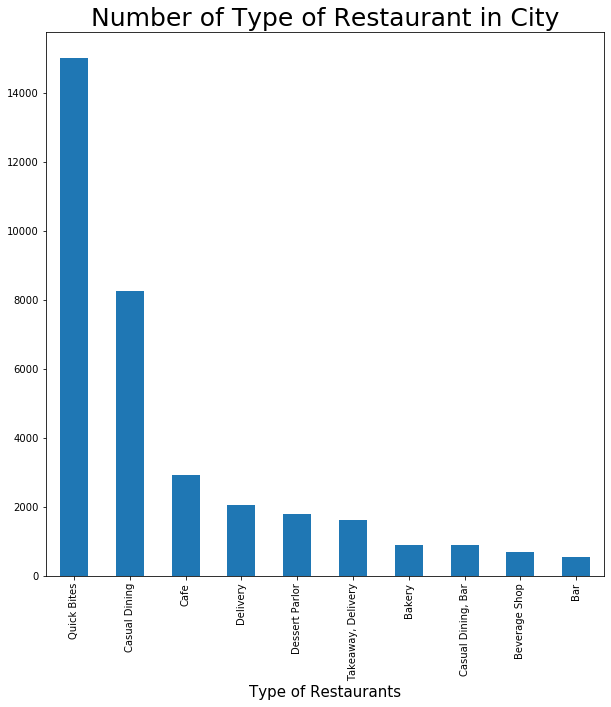

In [37]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

---
## 4.7 Average cost for two person

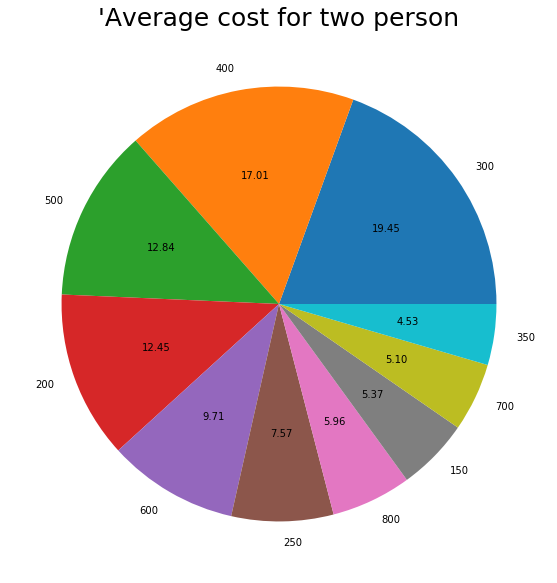

In [38]:
plt.figure(figsize=(10,10))

ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

---
## 4.8 Top 10 dished_liked in Bangalore

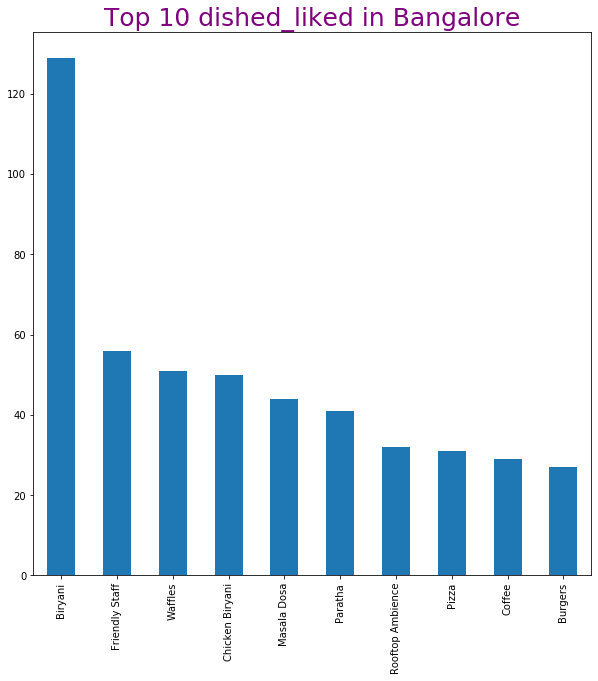

In [39]:
plt.figure(figsize=(10,10))
ax=df['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dished_liked in Bangalore",fontsize=25,color='purple')
plt.show()

In [40]:
df['rates']=df['rates'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40641 entries, 0 to 41372
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  40641 non-null  object 
 1   book_table    40641 non-null  object 
 2   votes         40641 non-null  int32  
 3   rest_type     40641 non-null  object 
 4   dish_liked    18710 non-null  object 
 5   cuisines      40641 non-null  object 
 6   avg_cost      40641 non-null  int32  
 7   meal_type     40641 non-null  object 
 8   city          40641 non-null  object 
 9   rates         32967 non-null  float64
dtypes: float64(1), int32(2), object(7)
memory usage: 3.0+ MB


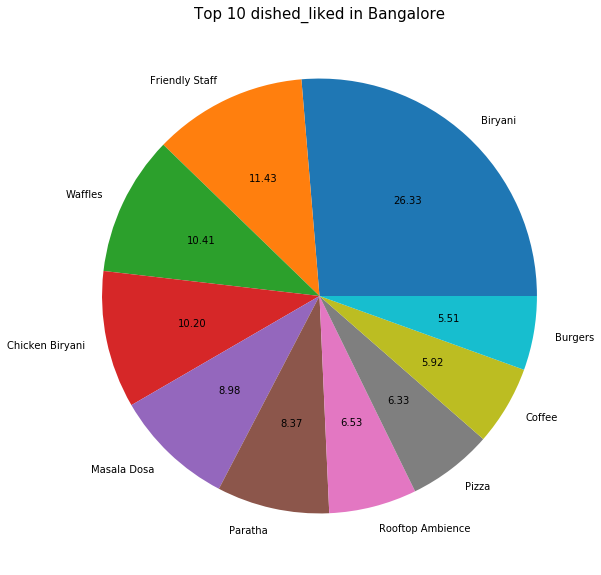

In [41]:
plt.figure(figsize=(10,10))
ax=df.dish_liked.value_counts()[:10]
label=df['dish_liked'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Top 10 dished_liked in Bangalore",fontsize=15)
plt.show()

### We can see that Biryani is most favorite in bangalore

---
## 4.9 Top 10 Cuisine

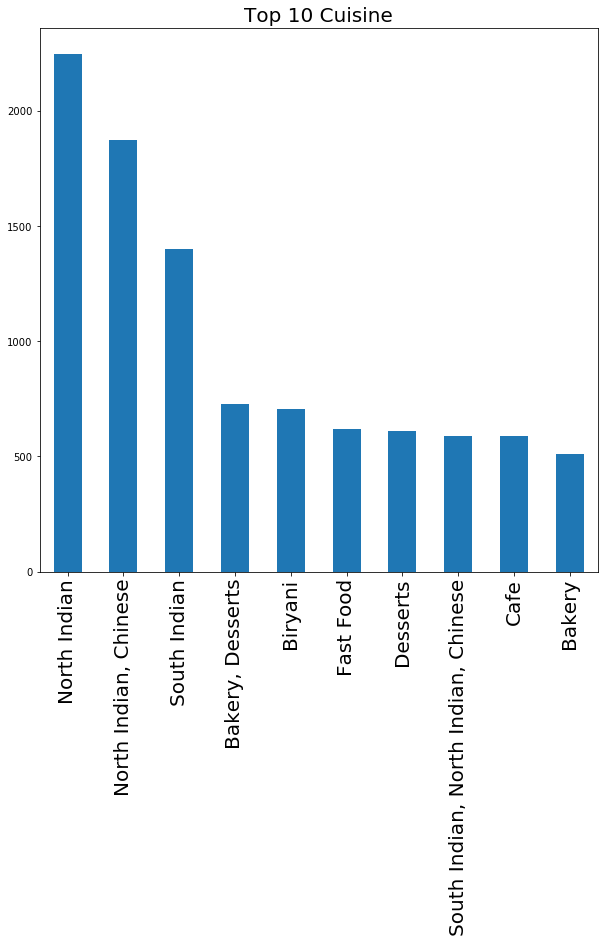

In [42]:
plt.figure(figsize=(10,10))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

---
## Rate VS Online Order

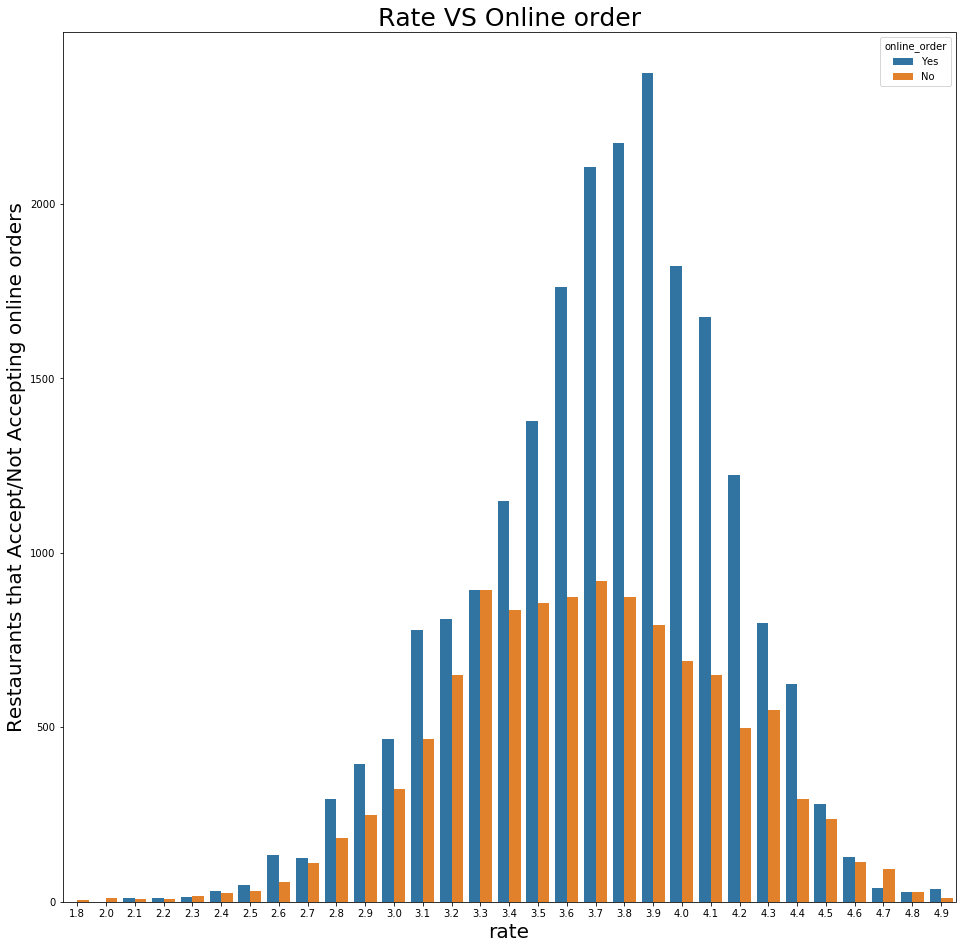

In [43]:
plt.figure(figsize=(16,16))

sns.countplot(x=df['rates'],hue=df['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

---
# 5. Data Preprocessing

## 5.1 Data transformation
### lets Convert categorical data into numerical data using LabelEncoding

### Now we drop unwanted Columns

In [44]:
df=df.drop(['dish_liked','meal_type'],axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,votes,rest_type,cuisines,avg_cost,city,rates
0,1,0,13,78,2148,350,27,3.1
1,0,1,5015,33,1204,1800,18,4.6
2,0,0,6,78,1574,250,16,3.4
3,0,0,699,27,2608,1500,27,4.3
4,1,0,129,14,1546,150,18,3.7


### As you can see out data is Label Encoded

---
# 6. Data Transformation

## 6.1 Feature Selection and Feature Scaling

### Select the feature and Label(target) from the data

In [47]:
df.shape

(40641, 8)

In [48]:
#Drop null values
df.dropna(how='any',inplace=True)
df.shape

(32967, 8)

In [49]:
# selecing features
features=df.drop(['rates'],axis=1)
features.shape

(32967, 7)

In [50]:
features.dtypes

online_order    int32
book_table      int32
votes           int32
rest_type       int32
cuisines        int32
avg_cost        int32
city            int32
dtype: object

In [51]:
df['rates'].unique()

array([3.1, 4.6, 3.4, 4.3, 3.7, 3. , 3.9, 4.1, 3.6, 3.8, 3.2, 3.3, 2.9,
       4.4, 4.2, 4. , 3.5, 2.7, 4.5, 4.7, 2.8, 2.2, 2.6, 2.5, 2.3, 4.8,
       2.4, 4.9, 2.1, 2. , 1.8])

In [52]:
# selecting Class/ Label
label=df['rates'].values
label

array([3.1, 4.6, 3.4, ..., 3.8, 3.5, 3.3])

## 6.1 Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [54]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 0.72470052, -0.4231752 , -0.38294836, ...,  1.06930393,
        -0.54324522,  1.54094152],
       [-1.37988035,  2.36308742,  5.26183764, ..., -0.20299816,
         2.58007341,  0.45619558],
       [-1.37988035, -0.4231752 , -0.3908479 , ...,  0.29567957,
        -0.7586465 ,  0.21514093],
       ...,
       [-1.37988035, -0.4231752 ,  2.23405658, ...,  1.51946165,
         0.21065928,  1.54094152],
       [ 0.72470052,  2.36308742, -0.34683618, ...,  0.59219065,
         1.28766571,  1.17935954],
       [-1.37988035, -0.4231752 , -0.3897194 , ...,  0.91700505,
        -0.86634714,  0.81777756]])

---
## 6.2 Split the data

### We splited out train and test set into 90% and 10% respectively

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [56]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29670, 7), (3297, 7), (29670,), (3297,))

---
## 6.3 Apply Regressions Models

---
## 1. Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train the model on train set

In [58]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Check the model socre on train and test set

In [59]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.3009735557484513
0.2772640899436044


### New Predict

In [60]:
lin_reg_pred=lin_reg.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 27.72640899436044


---
## 2. Ridge Regression

In [62]:
from sklearn.linear_model import Ridge

In [63]:
rr=Ridge()
rr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.3009735556166877
0.2772650519607286


In [66]:
rr_pred=rr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 27.72650519607286


---
## 3 Lasso

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lr=Lasso()
lr

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
lr.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.0
-0.00010692557855107587


In [72]:
lr_pred=lr.predict(X_test)

In [73]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LR :",lr_score)

Accuracy score for LR : -0.010692557855107587


---
## 4. Random Forest Regressor

In [74]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9841357056996111
0.8881252906065593


In [77]:
rfr_pred=rfr.predict(X_test)

In [78]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 88.81252906065592


---
## 5. Support Vector Regression

In [79]:
from sklearn.svm import SVR

In [80]:
svr=SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [81]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.4556810222352783
0.42578673539018397


In [82]:
svr_pred=svr.predict(X_test)

In [83]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 42.578673539018396


In [84]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,27.726409
1,Ridge Reg,27.726505
2,Lasso Reg,-0.010693
3,RandomForest Reg,88.812529
4,Support Vector Reg,42.578674


## As you can see from above data "Random Forest Regressor" Given the **highest Accuacry** score

---
# PREDICT THE RATING with Random Forest Regressor Model

In [85]:
rfr.predict([[1,0,13,73,1900,350,27]])

array([4.392])

## We got 4.4 Rating for out first predict over model

## Compare Actual rating with Random Forest Regressor new Predicted Rating

In [86]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.7,3.71
1,3.3,3.55
2,3.9,3.88
3,3.7,3.60
4,3.2,3.20
...,...,...
3292,4.5,4.47
3293,4.1,3.90
3294,3.8,3.83
3295,4.1,4.11


## AS you can see Our model is working good its predicted Ratings is Nearly to the Actual Ratings

---
## Save Ratings Sample as a CSV file

In [87]:
sample.to_csv("Model Prediction Sample.csv",index=False)